In [1]:
import pandas as pd
import numpy as np

iphone = pd.read_csv('iphone_purchase_records.csv')
iphone

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [2]:
X = iphone.iloc[:, :-1]
y = iphone.iloc[:, 3]

In [3]:
#Convert gender vallues to numbers

from sklearn.preprocessing import LabelEncoder

labelEncoder_gender = LabelEncoder()
X['Gender'] = labelEncoder_gender.fit_transform(X['Gender'])


In [4]:
#to convert all the dataset in X except last column to float

import numpy as np

X = np.vstack(iphone.iloc[:,:-1].values).astype(float)

ValueError: could not convert string to float: 'Male'

In [9]:
#Splitting dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fit classifier

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction  = model.predict(X_test)

In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [12]:
conda install graphviz

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    certifi-2023.7.22          |  py311haa95532_0         155 KB
    conda-23.7.2               |  py311haa95532_0         1.3 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0   

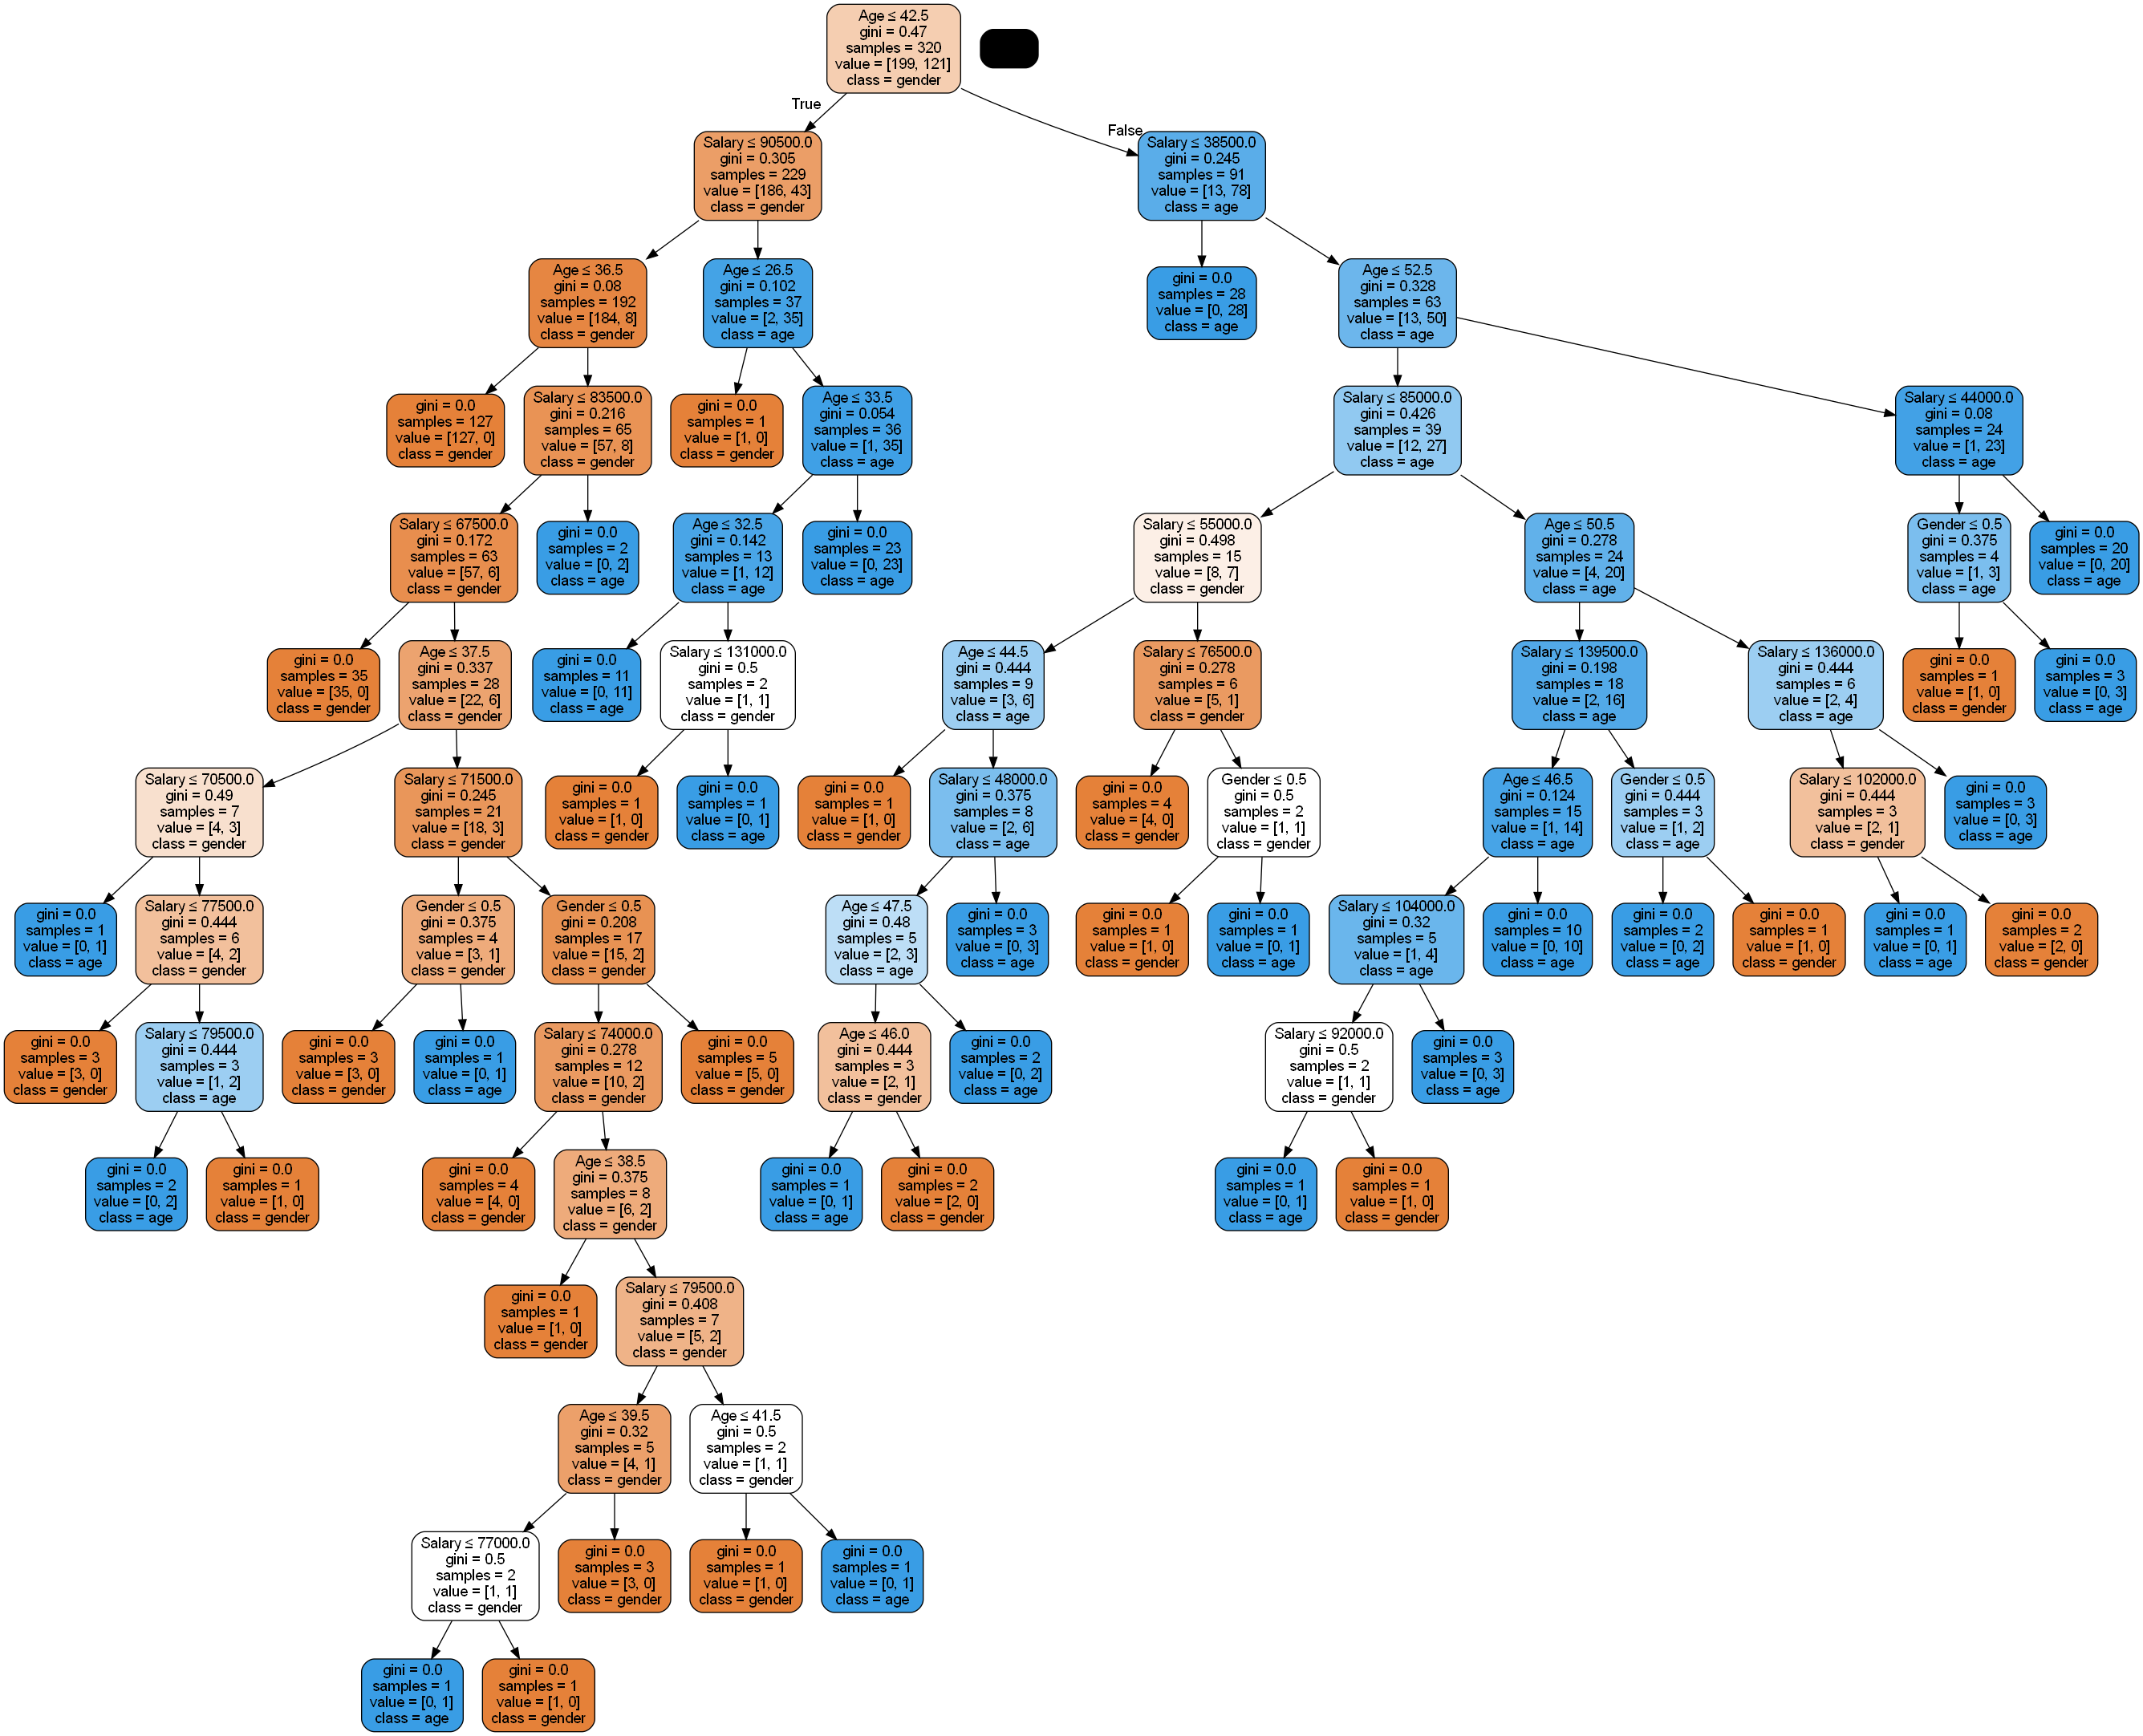

In [17]:
import joblib

joblib.dump(model, 'iphone-purchase.joblib')

model = joblib.load('iphone-purchase.joblib')

# Import necessary libraries
from sklearn.tree import export_graphviz
import io
import pydotplus

# Create a dot file with the decision tree visualization
dot_data = io.StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=iphone.columns[:-1], class_names=['gender', 'age', 'salary'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the visualization as a PNG file
graph.write_png("decision_tree.png")

# Display the visualization in a Jupyter Notebook
from IPython.display import Image
Image(graph.create_png())


In [15]:
#Evaluating model performance

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction)
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)

print("Confusion Matrix: ",cm)
print("Accuracy:" ,accuracy)
print("Precision:",precision)
print("recall",recall)

Confusion Matrix:  [[45 13]
 [ 2 20]]
Accuracy: 0.8125
Precision: 0.6060606060606061
recall 0.9090909090909091
